In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN # import DBSCAN clustering algorithm from scikit-learn

In [2]:
dataset= pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = dataset[["Annual Income (k$)","Spending Score (1-100)"]].values

Q1 Built in algorithms

In [5]:
from sklearn.cluster import AgglomerativeClustering as agg

X = agg(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y = X.fit_predict(x)

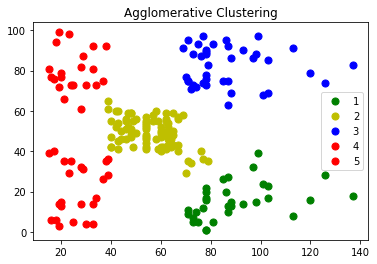

In [17]:
plt.scatter(x[y==0,0], x[y ==0,1],s=50,color = 'g',label = '1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,color = 'y',label = '2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,color='b',label = '3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,color='r',label = '4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,color='r',label = '5')
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

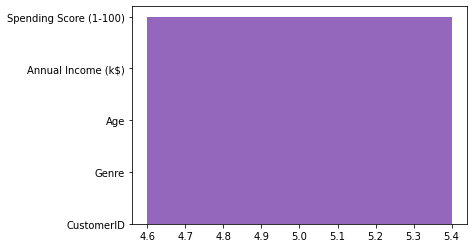

In [20]:
clusters=5
for i in dataset:
    plt.bar(clusters, i)

Kmeans - Algorithm

In [156]:
X = dataset[['Annual Income (k$)']]
Y = dataset['Spending Score (1-100)']

	Kmeans by Elbow Method




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


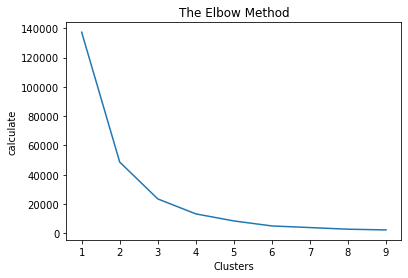

In [157]:
print("\tKmeans by Elbow Method\n\n")
calculate_cost = []

for i in range(1, 10):
    kmean = KMeans(i)
    kmean.fit(X)
    calculate_cost.append(kmean.inertia_)

clusters = range(1,10)
plt.plot(clusters, calculate_cost)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('calculate')
plt.show()

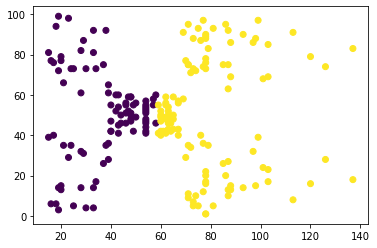

In [158]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

plt.scatter(X, Y, c=kmeans.labels_)

In [161]:
from sklearn.preprocessing import StandardScaler

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


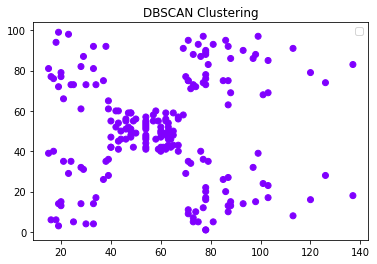

In [167]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load data
X = dataset[["Annual Income (k$)","Spending Score (1-100)"]].values

scaler = StandardScaler()
x=scaler.fit_transform(X)
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X) 
labels = dbscan.fit_predict(X)

# Visualize results
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow')

plt.title('DBSCAN Clustering') 
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


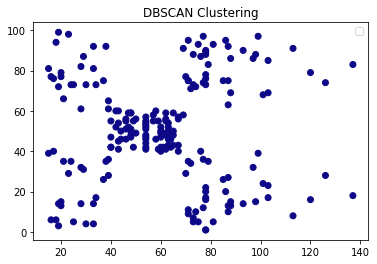

In [168]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='plasma')
plt.title('DBSCAN Clustering') 
plt.legend()
plt.show() 


Q2 self

In [149]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [169]:
def agglomerative_clustering(X, k):
    # Initialize each point as a separate cluster
    clusters = []
    for i in range(len(X)):
        clusters.append([i])
    
    # Merge clusters
    while len(clusters) > k:
        min_dist = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                cluster_dist = 0
                for p1 in clusters[i]:
                    for p2 in clusters[j]:
                        cluster_dist += euclidean_dist(X[p1], X[p2])
                cluster_dist /= len(clusters[i]) * len(clusters[j])
                if cluster_dist < min_dist:
                    min_dist = cluster_dist
                    min_i, min_j = i, j
        clusters[min_i] += clusters[min_j]
        del clusters[min_j]
    
    labels = [-1] * len(X)
    for i, cluster in enumerate(clusters):
        for point in cluster:
            labels[point] = i
    
    return labels


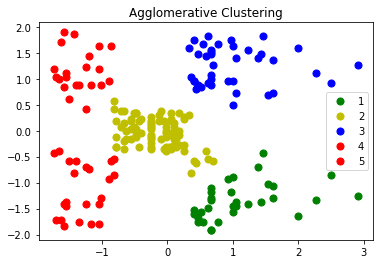

In [170]:
X = dataset[["Annual Income (k$)","Spending Score (1-100)"]].values

labels = agglomerative_clustering(X, k=5)

# Plot the results
plt.scatter(x[y==0,0], x[y ==0,1],s=50,color = 'g',label = '1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,color = 'y',label = '2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,color='b',label = '3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,color='r',label = '4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,color='r',label = '5')
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

Kmeans self built

In [152]:
def get_neighbors(X, point, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[i], X[point]) <= eps:
            neighbors.append(i)
    return neighbors

In [153]:
def expand_cluster(X, labels, point, neighbors, eps, min_pts, cluster_id):
    labels[point] = cluster_id
    i = 0
    
    while i < len(neighbors):
        n = neighbors[i]
        if labels[n] != -1:
            i += 1
            continue
        
        labels[n] = cluster_id
        new_neighbors = get_neighbors(X, n, eps)
        
        if len(new_neighbors) >= min_pts:
            neighbors += new_neighbors
        
        i += 1

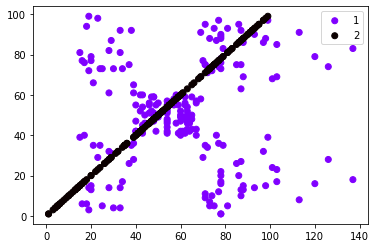

In [154]:
def dbscan(X, eps, min_pts):
    
    labels = [-1] * len(X)#unvisited points 
    
    core_pts = []
    #core points
    for point in range(len(X)):
        neighbors = get_neighbors(X, point, eps)
        if len(neighbors) >= min_pts:
            core_pts.append(point)
    
    #boundary points
    cluster_id = 0
    for point in core_pts:
        if labels[point] == -1:
            neighbors = get_neighbors(X, point, eps)
            expand_cluster(X, labels, point, neighbors, eps, min_pts, cluster_id)
            cluster_id += 1
    
   #noise points
    for point in range(len(X)):
        if labels[point] == -1:
            labels[point] = -1
    
    return labels

X = dataset[["Annual Income (k$)","Spending Score (1-100)"]].values
labels = dbscan(X, eps=0.5, min_pts=5)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow',label = '1')
plt.scatter(X[:, 1], X[:, 1], c=labels, cmap='hot',label='2')

plt.legend()
plt.show()
